In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [3]:
import joblib

# Data check

## Shape

In [4]:
train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

print(train.shape)
# print(test.shape)

(17500, 2)


In [5]:
train.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [6]:
# train.head().T

In [7]:
# test.head()

## Info

In [8]:
def data_summary(data):
    summary = pd.DataFrame(data.dtypes, columns=['Dtype'])
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Unique value'] = data.nunique().values
    summary['Null count'] = data.isnull().sum().values
    summary['Null percent'] = data.isnull().sum().values / len(data) * 100
    summary['Null percent'] = round(summary['Null percent'], 1)
    
    return summary

In [9]:
train_summary = data_summary(train)
train_summary

,Dtype,Unique value,Null count,Null percent
id,object,17500,0,0.0
has_cactus,int64,2,0,0.0


In [10]:
# test_summary = data_summary(test)

In [11]:
# summary = pd.concat([train_summary, test_summary], axis=1, keys=['Train', 'Test'])
# summary

In [12]:
train.dtypes.value_counts()

object    1
int64     1
dtype: int64

In [13]:
# test.dtypes.value_counts()

## 고유값 확인

In [14]:
for column in train.columns :
    print(f'{column} : {train[column].unique()}', '\n')

id : ['0004be2cfeaba1c0361d39e2b000257b.jpg'
 '000c8a36845c0208e833c79c1bffedd1.jpg'
 '000d1e9a533f62e55c289303b072733d.jpg' ...
 'fff059ecc91b30be5745e8b81111dc7b.jpg'
 'fff43acb3b7a23edcc4ae937be2b7522.jpg'
 'fffd9e9b990eba07c836745d8aef1a3a.jpg'] 

has_cactus : [1 0] 



In [15]:
# summary[summary['Train']['Unique value'] != summary['Test']['Unique value']]

In [16]:
# One-hot-encoding 시 주의해야 할 column들
# summary[(summary['Train']['Unique value'] != summary['Test']['Unique value'])
#                         & (summary['Train']['Dtype'] == 'object')]

In [17]:
# 고유값이 너무 많은 column들
# columns_many = summary[(summary['Train']['Unique value'] > 100) & (summary['Train']['Dtype'] == 'object')]
# columns_many

In [18]:
# list(columns_many.index)

## 결측치 확인

In [19]:
train_null = train_summary[train_summary['Null count'] > 0]
train_null

,Dtype,Unique value,Null count,Null percent


In [20]:
# test_null = test_summary[test_summary['Null count'] > 0]

In [21]:
# null_columns = pd.concat([train_null, test_null], axis=1, keys=['Train', 'Test'])
# null_columns

In [22]:
# train[null_columns.index].dtypes.value_counts()

In [23]:
# test[null_columns.index].dtypes.value_counts()

# 통계 및 분포 확인

## 수치형 data

In [24]:
train.describe()

,has_cactus
count,17500.000000
mean,0.750629
std,0.432662
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [25]:
columns_num = train.describe().columns

array([[<AxesSubplot:title={'center':'has_cactus'}>]], dtype=object)

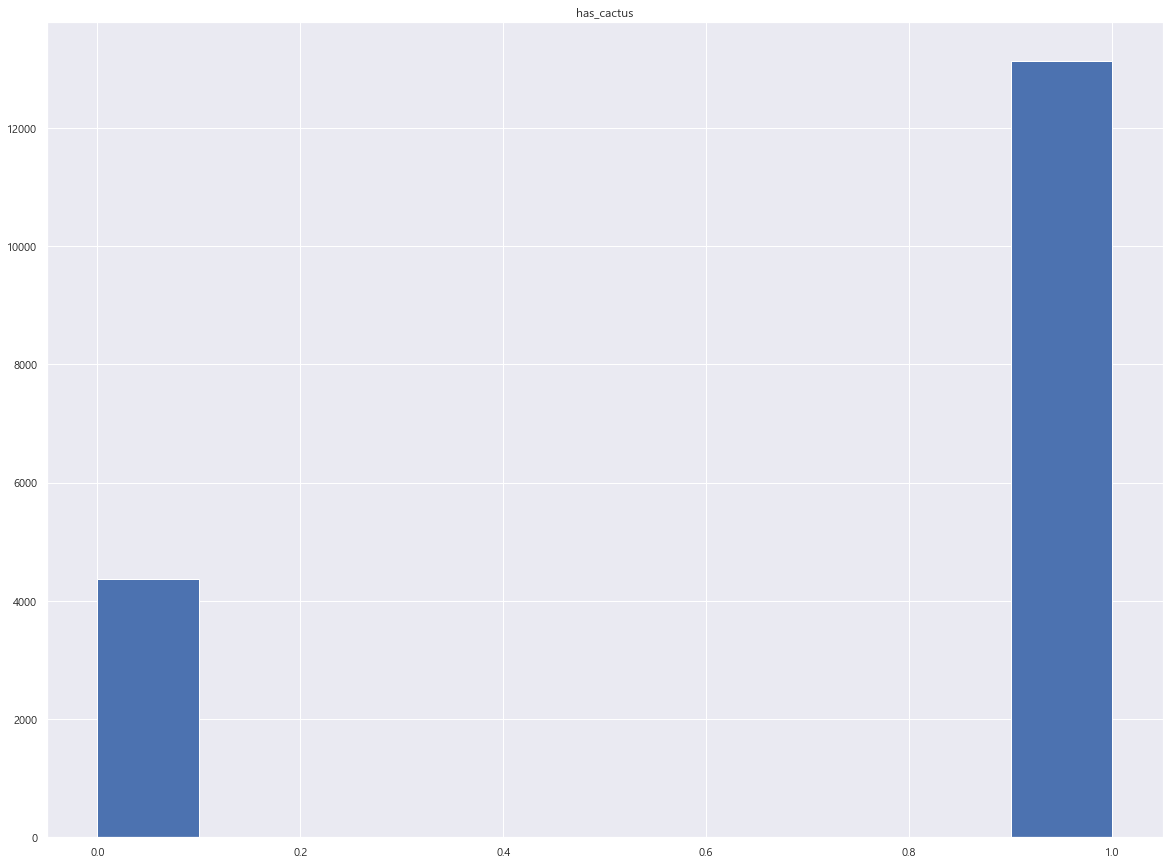

In [26]:
train[columns_num].hist(figsize=(20,15))

In [27]:
# test.describe()

In [28]:
# columns_num = test.describe().columns

In [29]:
# test[columns_num].hist(figsize=(20,15))

### 범주형 data 추출

In [30]:
columns_int = list(train.select_dtypes(include=['int64']).columns)
columns_int

['has_cactus']

In [31]:
columns_int.remove('has_cactus')

In [32]:
columns_float = list(train.select_dtypes(include=['float64']).columns)
columns_float

[]

In [33]:
columns_to_cat = columns_int + columns_float
columns_to_cat

[]

### binary data 추출

In [34]:
columns_binary_num = []

In [35]:
# joblib.dump(columns_binary_num, 'columns_binary_num.pkl')

## 범주형 data

In [36]:
columns_str = list(train.select_dtypes(include=['object']).columns)
columns_str

In [37]:
columns_bool = list(train.select_dtypes(include=['bool']).columns)
columns_bool

In [38]:
columns_cat = columns_str + columns_bool + columns_to_cat
columns_cat

['id']

In [39]:
# joblib.dump(columns_cat, 'columns_cat.pkl')